### Logistic Regression using Titanic dataset

We'll be trying to predict a clssification - survival or deceased.

In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# change working directory
import os
os.chdir("G:\My Drive\MSA\Projects\logistic_regression\\titanic")
print(os.getcwd())

G:\My Drive\MSA\Projects\logistic_regression\titanic


In [11]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


passengerID - type should be integers <br/>
survived - survived or not <br/>
pclass - class of travel of every passenger <br/>
name - the name of the passenger <br/>
sex - gender <br/>
age - age of passengers <br/>
sibsp - number of siblings/spouse aboard <br/>
parch - number of parent/child aboard <br/>
ticket - ticket number <br/>
fare - what prices they paid <br/>
cabin - cabin number <br/>
embarked - the port where a passenger has embarked <br/>
    C - Cherbourg, S - Southhampton, Q - Queenstown

In [12]:
# how many people
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Explanatory Data Analysis

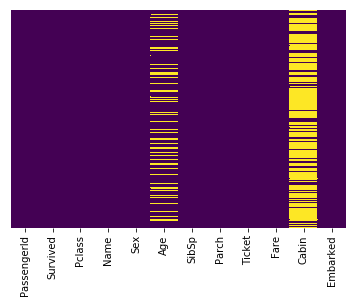

In [15]:
# missing data
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of the age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

### Data Visualizations

Using Seaborn library for data visualization. 

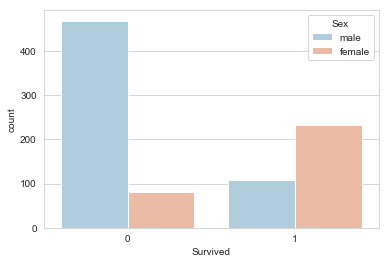

In [20]:
# count-plot of peopel survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

The people who did not survive were much more likely to be male and people who did survive were almost like twice as likely to be female

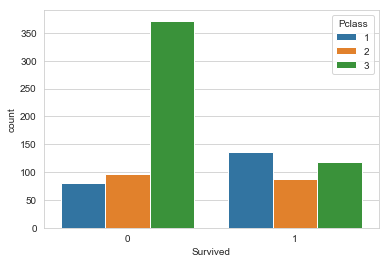

In [21]:
# number of peopel who survived according to their passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data = train)

People who did not survive were more likely to be belonging to third class (lower class), the cheapest to get on to and peopel who did survive were more towards belonging to higher classes.

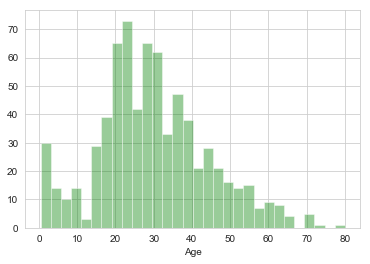

In [22]:
# distribution plot of age of the people
sns.distplot(train['Age'].dropna(), kde = False, bins = 30, color = 'Green')

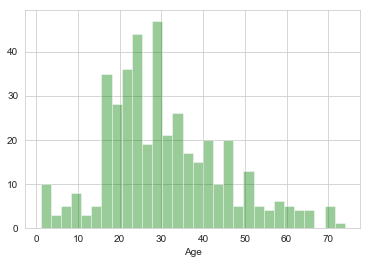

In [26]:
survived = train[train['Survived']==0]
sns.distplot(survived['Age'].dropna(), kde = False, bins = 30, color = 'Green')

The average age group of people to survive is somewhere between 20 to 30 and as older you get lesser chances of you to have on board

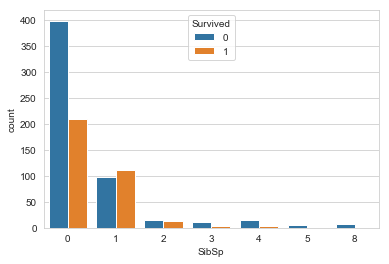

In [29]:
# countplot of the people having siblings or spouse
sns.countplot(x='SibSp', data = train, hue = 'Survived')

Looking at this plot we can directly tell that most people on board did not have either children, siblings or spouse on board and the second most popular option is 1 which is more likely to be spouse. We have a lot of single people on board, hey don't have spouse or children. 

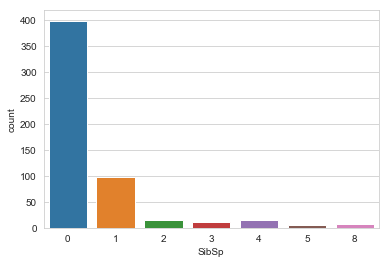

In [27]:
sns.countplot(x = 'SibSp', data = survived)

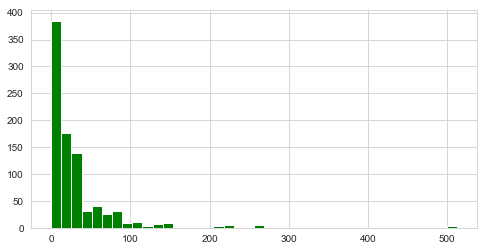

In [30]:
# distribution plot of the ticket fare
train['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

It looks like most of the purchase prices are between 0 and 50, which actually makes sense tickets are more distributed towards cheaper fare prices because most passengers are in cheaper third class

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age by passenger class

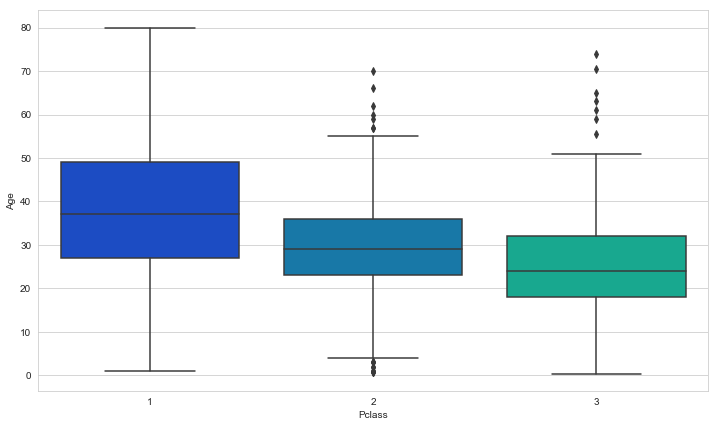

In [31]:
# boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [35]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
                    return 37
        elif Pclass == 2:
                    return 29
        else:
                    return 24
    else:
        return Age

In [42]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

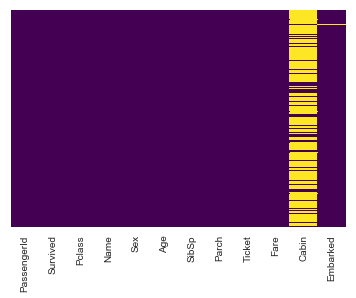

In [43]:
# heatmap
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [44]:
# drop the Cabin column and the row in Embarked that is NaN
train.drop('Cabin', axis = 1, inplace = True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

# drop the sex, embarked, name and tickets colums
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

# concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark], axis = 1)

# check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression Model


In [47]:
# spliting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.30, random_state=101)

In [48]:
# training
# importing the LogisticRegression package from the Linear model family
from sklearn.linear_model import LogisticRegression

# create an instance of the logistic regression model and fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Jiin Son\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# predictions
Predictions = logmodel.predict(X_test)

### Model Evaluation

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[148  15]
 [ 39  65]]
